In [22]:
import os
import pandas as pd
# create the feature- and actuals-data list
# set the feature and actuals year lists
feature_years = ['2017','2018','2019','2020']
actual_years = ['2018','2019','2020','2021']

actuals_df_list = []
features_df_list = []

# path to the current directory
current_dir = os.getcwd()

for i in range(len(feature_years)):
    # relative paths to the parquet files
    relative_path_features = os.path.join('..', 'data', 'cm_features_to_oct' + feature_years[i] + '.parquet')
    relative_path_actuals = os.path.join('..', 'data', 'cm_actuals_' + actual_years[i] + '.parquet')

    path_features = os.path.join(current_dir, relative_path_features)
    path_actuals = os.path.join(current_dir, relative_path_actuals)

    # append datasets to the lists
    actuals_df_list.append({'year':actual_years[i], 'data':pd.read_parquet(path_actuals, engine='pyarrow')})
    features_df_list.append({'year':feature_years[i], 'data':pd.read_parquet(path_features, engine='pyarrow')})

# concat the feature datasets, so that every data contains the observations starting with january 1990
for i in range(1,len(features_df_list)):
    features_df_list[i]['data'] = pd.concat([features_df_list[i-1]['data'], features_df_list[i]['data']])

country_list = sorted(features_df_list[3]['data'].index.get_level_values('country_id').unique().tolist())

# country group list of all four datasets
country_feature_group_list = []
country_actual_group_list = []
# fill list 
for i in range(len(features_df_list)):
    country_feature_group_list.append(features_df_list[i]['data'].groupby('country_id'))
    country_actual_group_list.append(actuals_df_list[i]['data'].groupby('country_id'))

In [23]:
prediction_year = '2021' # 2019, 2020, 2021
country_to_plot = 70
s = 8


dataset_index = actual_years.index(prediction_year)
actual_data = actuals_df_list[dataset_index]['data']
actual_group = actual_data.groupby('country_id')
y_true = actual_group.get_group(country_to_plot).iloc[s-3,0]
prediction_month = actual_data.index.get_level_values('month_id').unique().to_list()[s-3]

In [24]:
import pandas as pd
from joblib import load
import numpy as np
import os

# Pfad zur Parquet-Datei
parquet_file_path = r'C:\Users\Tobias\Documents\BAconflictPrediction\ConflictPrediction\benchmark views\bm_cm_last_historical_poisson_expanded_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
benchmark_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\bodentien_cm_nbinom_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_nbinom_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\cm_hurdle_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_hurdle_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\cm_NeuralNet_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_nn_data = pd.read_parquet(parquet_file_path)

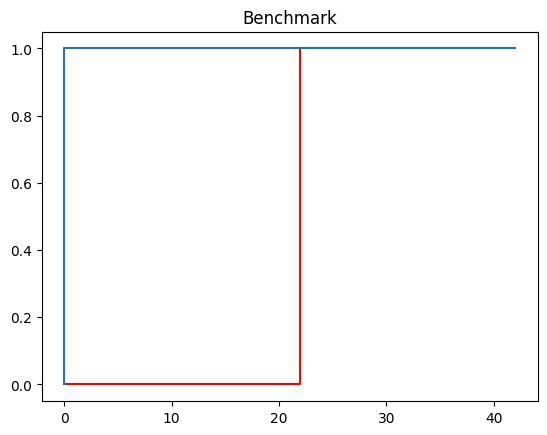

In [25]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_benchmark = benchmark_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_benchmark = np.sort(empirical_distribution_benchmark)

sample = empirical_distribution_benchmark
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([sample_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.title('Benchmark')
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_8896\4215118257.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()


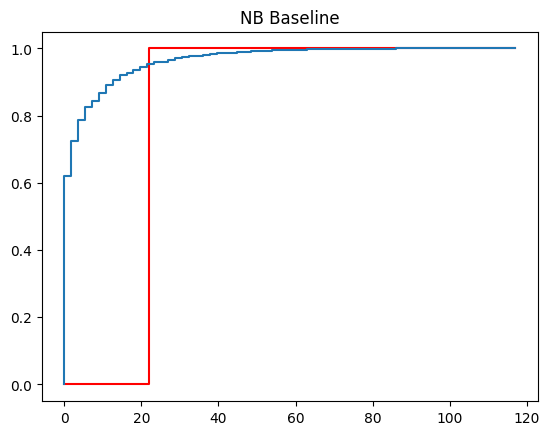

In [26]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NBbaseline = np.sort(empirical_distribution_NBbaseline)

sample = empirical_distribution_NBbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.title('NB Baseline')
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_8896\1619862171.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()


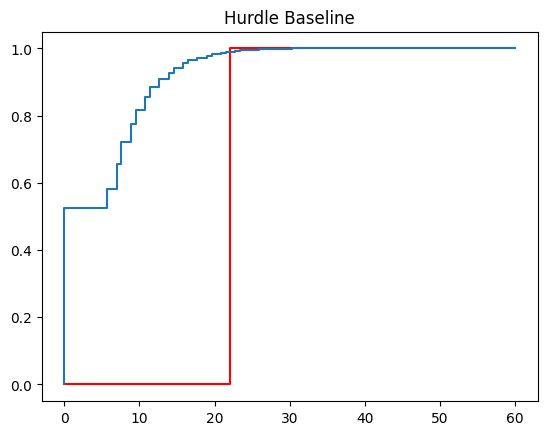

In [27]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_HURDLEbaseline = np.sort(empirical_distribution_HURDLEbaseline)

sample = empirical_distribution_HURDLEbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))



sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.title('Hurdle Baseline')
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_8896\532526436.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()


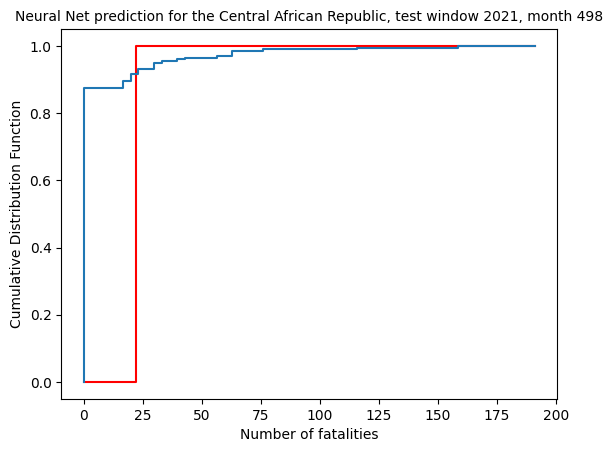

In [40]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NNbaseline = np.sort(empirical_distribution_NNbaseline)

sample = empirical_distribution_NNbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.xlabel('Number of fatalities')
plt.ylabel('Cumulative Distribution Function')
plt.title('Neural Net prediction for the Central African Republic, test window 2021, month ' + str(prediction_month), fontsize=10, y=1)
#plt.suptitle('Neural Net prediction for the Central African Republic, test window 2021, month ' + str(prediction_month), fontsize=10, y=0.99)
plt.show()